In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,recall_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb #pip install xgboost to use this library

In [2]:
sales_df=pd.read_csv('Advertising.csv')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
sales_df.rename(columns={'Unnamed: 0': 'Serial Number'}, inplace=True)

In [4]:
print(sales_df.head())
print(sales_df.info())

   Serial Number     TV  Radio  Newspaper  Sales
0              1  230.1   37.8       69.2   22.1
1              2   44.5   39.3       45.1   10.4
2              3   17.2   45.9       69.3    9.3
3              4  151.5   41.3       58.5   18.5
4              5  180.8   10.8       58.4   12.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Serial Number  200 non-null    int64  
 1   TV             200 non-null    float64
 2   Radio          200 non-null    float64
 3   Newspaper      200 non-null    float64
 4   Sales          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [5]:
sales_df = sales_df.drop(columns=['Serial Number'])

In [6]:
numeric_columns = sales_df.select_dtypes(include=['number'])

# Calculate mean, median, standard deviation, minimum, and maximum
summary_stats = numeric_columns.agg(['mean', 'median', 'std', 'min', 'max'])

print(summary_stats)

                TV      Radio   Newspaper      Sales
mean    147.042500  23.264000   30.554000  14.022500
median  149.750000  22.900000   25.750000  12.900000
std      85.854236  14.846809   21.778621   5.217457
min       0.700000   0.000000    0.300000   1.600000
max     296.400000  49.600000  114.000000  27.000000


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

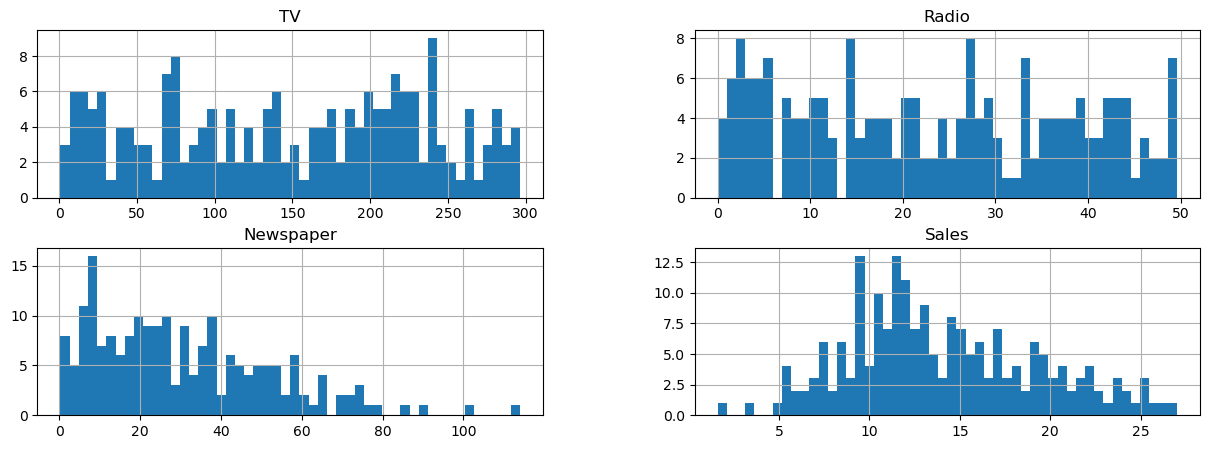

In [7]:
sales_df.hist(bins=50, figsize=(15,5)) # plot histograms of numeric coloumns 

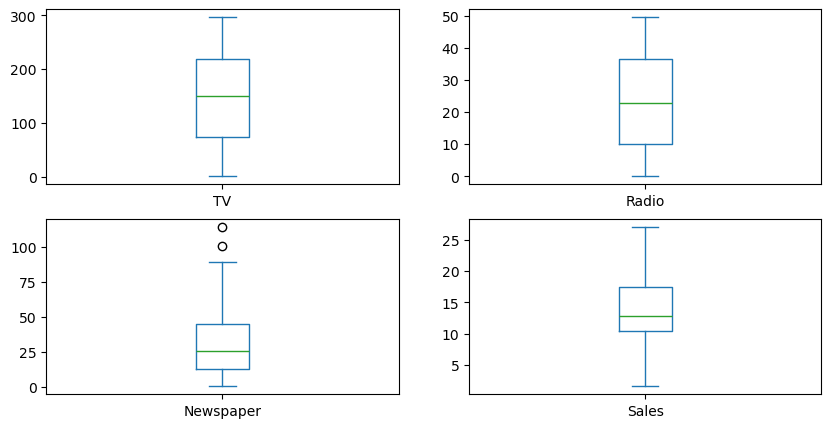

In [8]:
sales_df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 5), sharex=False, sharey=False)
plt.show()

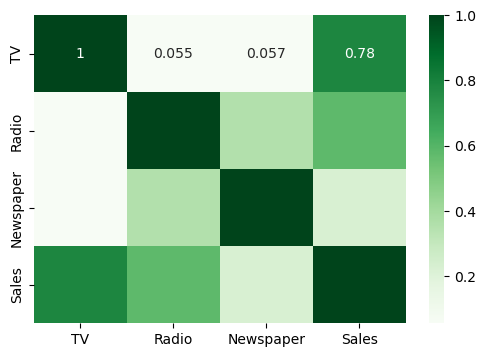

In [9]:
correlation_matrix = sales_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.show()

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

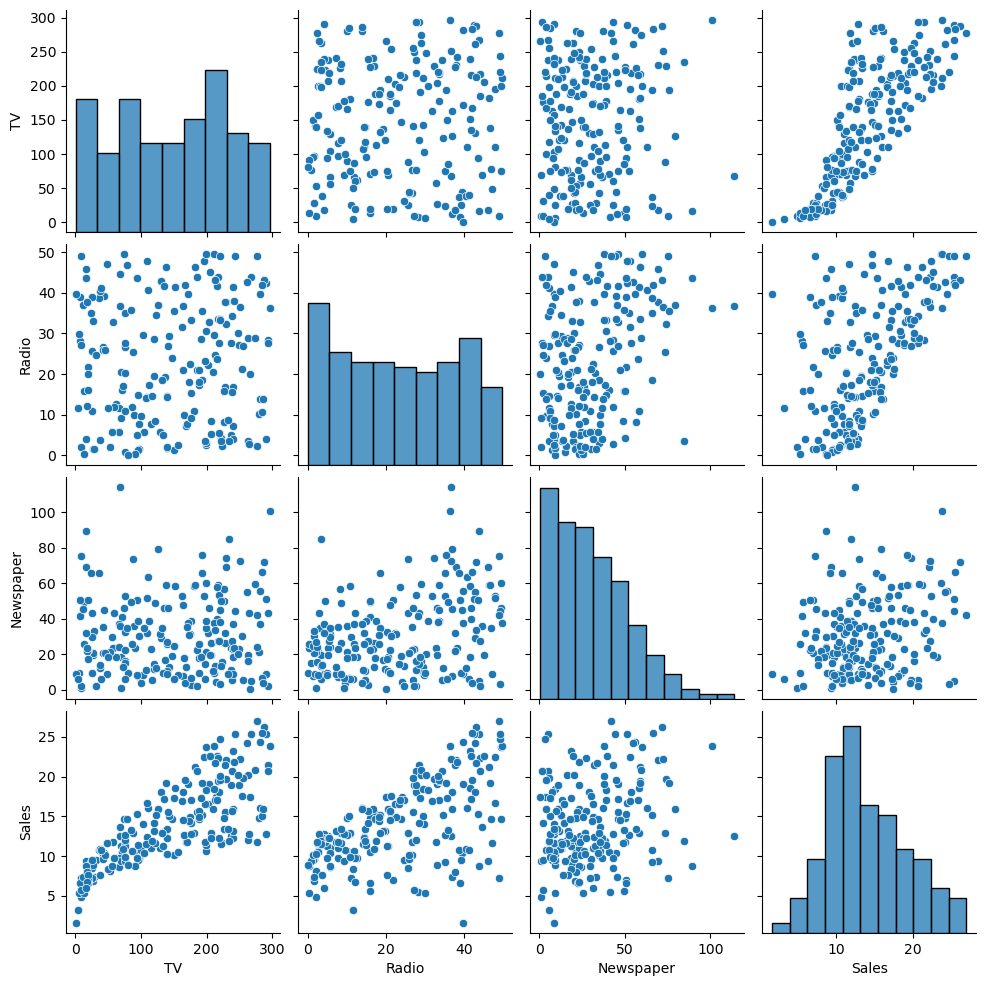

In [10]:
sns.pairplot(sales_df)
plt.show()

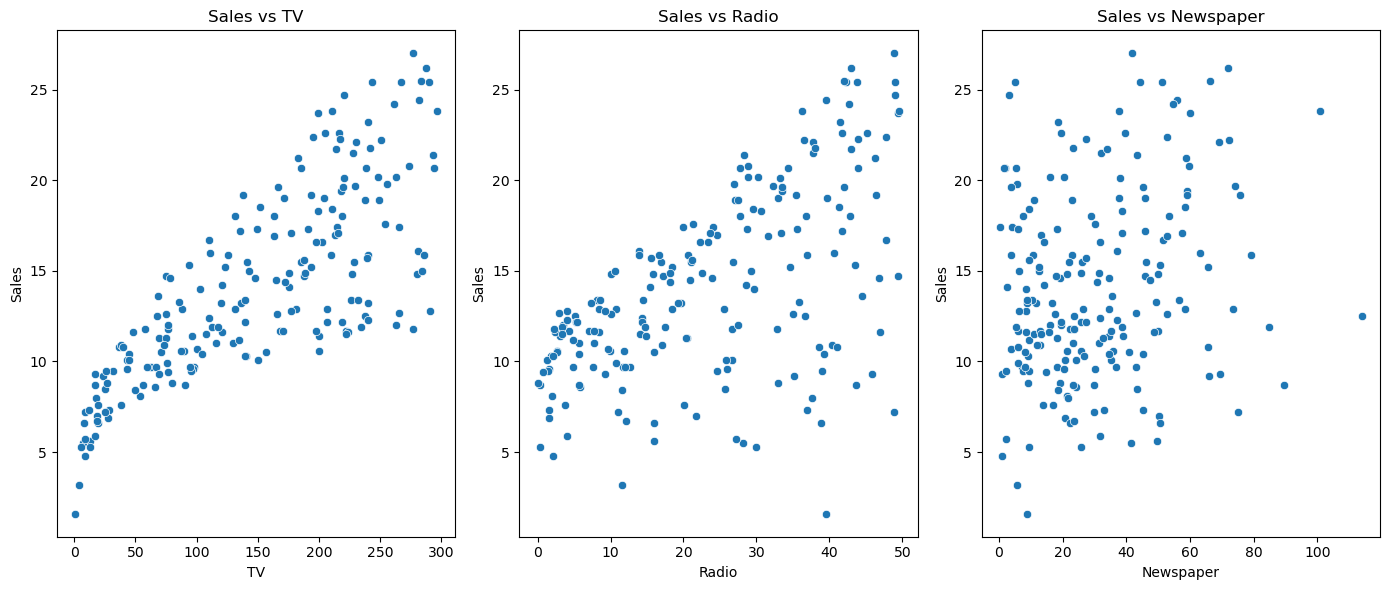

In [11]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=sales_df)
plt.title('Sales vs TV')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=sales_df)
plt.title('Sales vs Radio')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=sales_df)
plt.title('Sales vs Newspaper')

plt.tight_layout()
plt.show()

In [12]:
sales_df['TV_Radio_Interaction'] = sales_df['TV'] * sales_df['Radio']
sales_df['Radio_Newspaper_Interaction'] = sales_df['Radio'] * sales_df['Newspaper']
sales_df['Newspaper_TV_Interaction'] = sales_df['Newspaper'] * sales_df['TV'] 

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(sales_df.drop('Sales', axis=1))

# Convert scaled features back to a DataFrame
sales_df_scaled = pd.DataFrame(scaled_features, columns=sales_df.columns[:-1])
sales_df_scaled['Sales'] = sales_df['Sales'].values

print(sales_df_scaled.head())


         TV     Radio  Newspaper  Sales  TV_Radio_Interaction  \
0  0.969852  0.981522   1.778945   22.1              1.914570   
1 -1.197376  1.082808   0.669579   10.4              1.013068   
2 -1.516155  1.528463   1.783549    9.3              2.518661   
3  0.052050  1.217855   1.286405   18.5              1.701084   
4  0.394182 -0.841614   1.281802   12.9             -0.207396   

   Radio_Newspaper_Interaction  
0                     2.330912  
1                    -0.533326  
2                    -0.701070  
3                     0.877761  
4                     1.226832  


In [14]:
X = sales_df.drop('Sales', axis=1)
y = sales_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#linear regression model

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.2f}")


Linear Regression
Mean Squared Error: 0.79
R^2 Score: 0.98


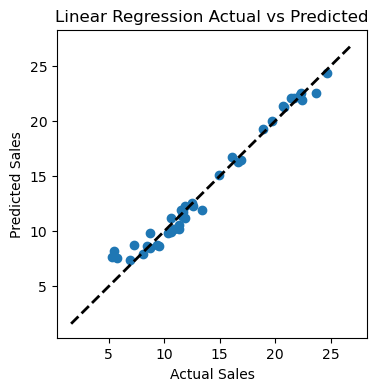

In [19]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Actual vs Predicted')
plt.show()

In [20]:
#decission tree model

In [21]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_dt):.2f}")

Decision Tree
Mean Squared Error: 1.32
R^2 Score: 0.96


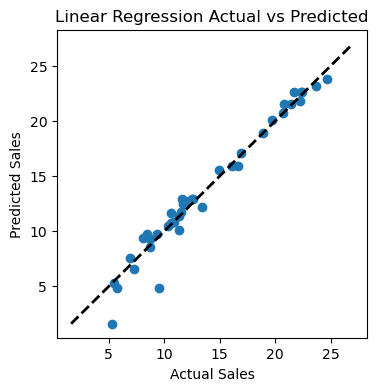

In [22]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_dt)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Actual vs Predicted')
plt.show()

In [23]:
#Random forest model

In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf):.2f}")

Random Forest
Mean Squared Error: 0.35
R^2 Score: 0.99


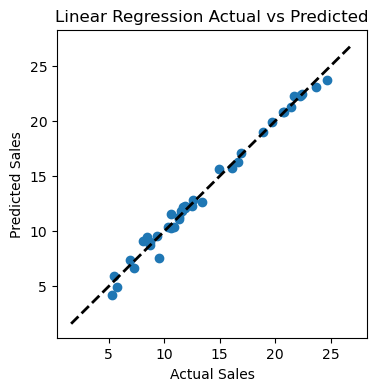

In [25]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Actual vs Predicted')
plt.show()

In [26]:
#xg boost model

In [27]:
xgbr = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
print("Xg Boost")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgbr):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgbr):.2f}")

Xg Boost
Mean Squared Error: 0.37
R^2 Score: 0.99


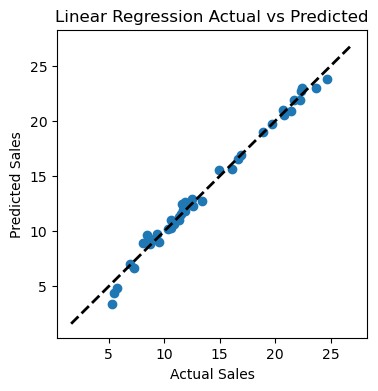

In [28]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_xgbr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression Actual vs Predicted')
plt.show()

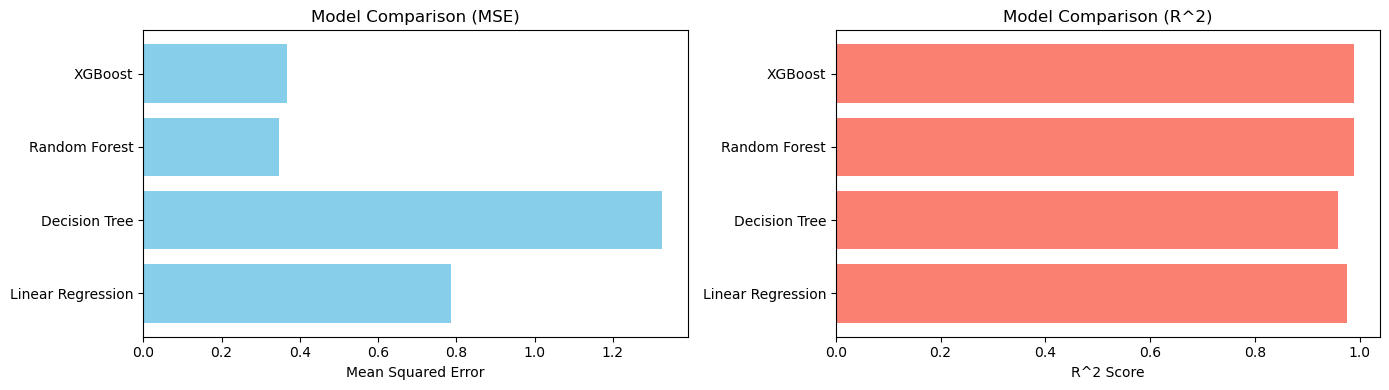

In [29]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mse_scores = [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgbr)]
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_dt),r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgbr)]

# Plotting the results
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.barh(models, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison (MSE)')

plt.subplot(1, 2, 2)
plt.barh(models, r2_scores, color='salmon')
plt.xlabel('R^2 Score')
plt.title('Model Comparison (R^2)')

plt.tight_layout()
plt.show()